<a href="https://colab.research.google.com/github/bentech28/AI-E-101-May-17--2024---Bounyamine-Baparape/blob/main/1A_FunnyDice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Topic 1 - Creating a DataFrame for a probability problem




The faces of the red die show 1, 2, 2, 3, 3, 4

The faces of the green die show 1, 3, 4, 5, 6, 8

### Creating each column as a list

In [ ]:
# Creating each column as a list
Red = [1]*6 + [2]*12 + [3]*12 + [4]*6
Green = [1, 3, 4, 5, 6, 8] * 6

print(Red)
print(Green)
type(Red)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4]
[1, 3, 4, 5, 6, 8, 1, 3, 4, 5, 6, 8, 1, 3, 4, 5, 6, 8, 1, 3, 4, 5, 6, 8, 1, 3, 4, 5, 6, 8, 1, 3, 4, 5, 6, 8]


list

### Combining the columns into a DataFrame

In [ ]:
# Combining the columns into a DataFrame
FunnyDice = pd.DataFrame({'Red': Red, 'Green': Green})
print(FunnyDice)
FunnyDice.shape


    Red  Green
0     1      1
1     1      3
2     1      4
3     1      5
4     1      6
5     1      8
6     2      1
7     2      3
8     2      4
9     2      5
10    2      6
11    2      8
12    2      1
13    2      3
14    2      4
15    2      5
16    2      6
17    2      8
18    3      1
19    3      3
20    3      4
21    3      5
22    3      6
23    3      8
24    3      1
25    3      3
26    3      4
27    3      5
28    3      6
29    3      8
30    4      1
31    4      3
32    4      4
33    4      5
34    4      6
35    4      8


(36, 2)

### Any even quicker way is to use itertools.product

In [ ]:
from itertools import product

In [ ]:
FDice = pd.DataFrame(list(product([1, 2, 2, 3, 3, 4], [1, 3, 4, 5, 6, 8])), columns=['Red', 'Green'])
print(FDice.head())

   Red  Green
0    1      1
1    1      3
2    1      4
3    1      5
4    1      6


### Create a vector with the total roll (add random variables)

In [ ]:
total = FunnyDice['Red'] + FunnyDice['Green']
print(total)

0      2
1      4
2      5
3      6
4      7
5      9
6      3
7      5
8      6
9      7
10     8
11    10
12     3
13     5
14     6
15     7
16     8
17    10
18     4
19     6
20     7
21     8
22     9
23    11
24     4
25     6
26     7
27     8
28     9
29    11
30     5
31     7
32     8
33     9
34    10
35    12
dtype: int64


### Make a table of the frequency of each total

In Python, the **value_counts()** method of Pandas counts the number of occurrences of each unique value in a Series.

The value_counts() method returns a Series object where the unique values are the index and the frequencies are the values. Then, **sort_index()** sorts these unique values (which are the index) in ascending order.

Thus, the line of code tbl = total.value_counts().sort_index() creates a Series object tbl that contains the count of each possible sum of dice values, sorted in ascending order.







In [ ]:
tbl = total.value_counts().sort_index()
print(tbl)

2     1
3     2
4     3
5     4
6     5
7     6
8     5
9     4
10    3
11    2
12    1
Name: count, dtype: int64


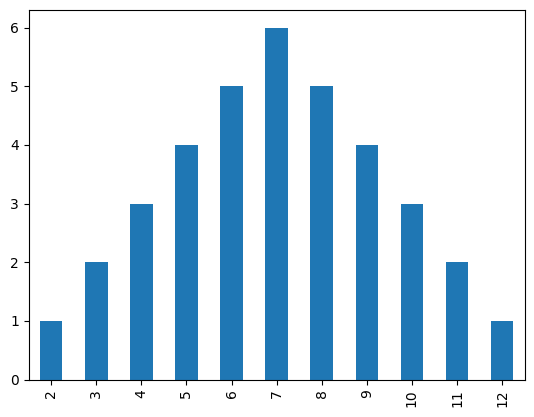

In [ ]:
tbl.plot(kind='bar')
plt.show()

### If the dice are fair, each row has a probability of 1/36. The mass function is

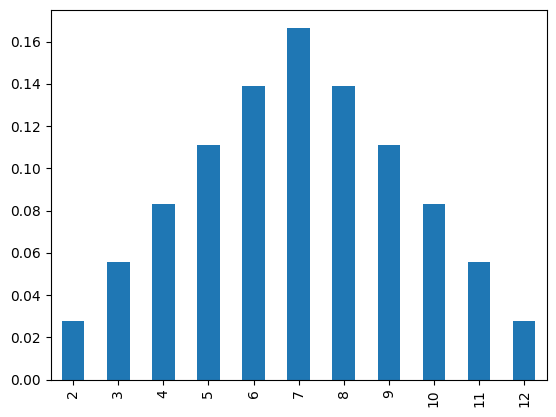

In [ ]:
mass = tbl / 36
mass.plot(kind='bar')
plt.show()

# Topic 2 - Generating samples from a DataFrame

### Simulating rolling the dice by sampling

In [ ]:
list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
print(list)
print(np.random.choice(list, 10, replace=True))

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[ 4 12 18 16  4  4  2 20  2  6]


In [ ]:
print(np.random.choice(total, 10, replace=False))
#print(np.random.choice(total, 10, replace=True))

[6 6 7 9 5 6 3 9 7 8]


### Sampling from the columns

In [ ]:
print(np.random.choice(FunnyDice['Red'], 10, replace=True))
#print(np.random.choice(FunnyDice['Red'], 10, replace=True))

[2 1 2 2 2 3 3 3 4 2]


### If we try to sample directly from a DataFrame, we get randomly chosen columns

This line of code is using the sample() method of the DataFrame FunnyDice to randomly select 5 rows from the DataFrame with replacement, meaning that the same row can be selected multiple times.

In [ ]:
print(FunnyDice.sample(5, replace=False))

    Red  Green
24    3      1
14    2      4
32    4      4
6     2      1
17    2      8


### Extracting one or more rows from a DataFrame

In [ ]:
print(FunnyDice.iloc[14])

Red      2
Green    4
Name: 14, dtype: int64


In [ ]:
print(FunnyDice.iloc[[1, 4, 6]])

   Red  Green
1    1      3
4    1      6
6    2      1


### Sampling from the index values and getting a new DataFrame

In [ ]:
indices = np.random.choice(range(36), 36, replace=True)
print(indices)

[28  9 34  4  2  5 23  4 28  3]


In [ ]:
print(FunnyDice.iloc[indices])

    Red  Green
28    3      6
9     2      5
34    4      6
4     1      6
2     1      4
5     1      8
23    3      8
4     1      6
28    3      6
3     1      5


In [ ]:
print(isinstance(FunnyDice.iloc[indices], pd.DataFrame))

True


### A DataFrame with 36 rows is now a genuine random sample

In [ ]:
sample36 = FunnyDice.iloc[np.random.choice(range(36), 36, replace=False)]
print(sample36)

    Red  Green
14    2      4
26    3      4
16    2      6
24    3      1
35    4      8
13    2      3
10    2      6
4     1      6
27    3      5
12    2      1
28    3      6
33    4      5
9     2      5
15    2      5
25    3      3
6     2      1
2     1      4
31    4      3
22    3      6
1     1      3
3     1      5
7     2      3
17    2      8
32    4      4
8     2      4
34    4      6
18    3      1
19    3      3
5     1      8
30    4      1
20    3      4
0     1      1
11    2      8
21    3      5
29    3      8
23    3      8


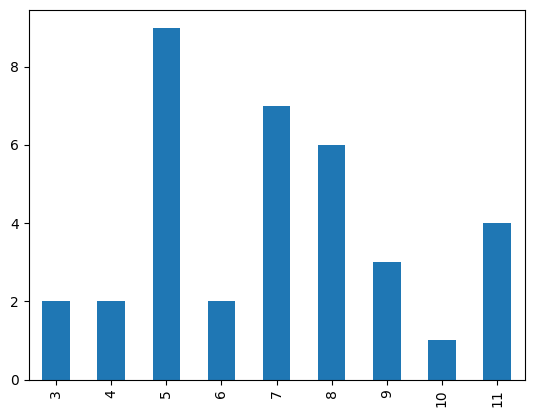

In [ ]:
sample36_total = sample36['Red'] + sample36['Green']
sample36_total.value_counts().sort_index().plot(kind='bar')
plt.show()

### With lots of samples the histogram looks like the mass function

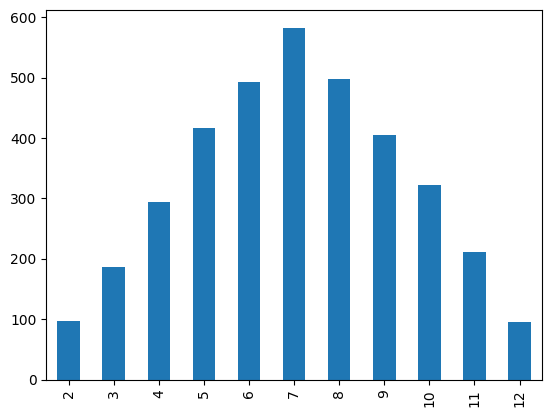

In [ ]:
sample3600 = FunnyDice.iloc[np.random.choice(range(36), 3600, replace=True)]
sample3600_total = sample3600['Red'] + sample3600['Green']
sample3600_total.value_counts().sort_index().plot(kind='bar')
plt.show()